#Introduction

[1)load data and necessary libraries](#1)

[2)exploratory data analysis](#2)

[3)derive new variable](#3)

[4)handling outliers and missing values](#4)

[5)One hot encoding](#5)

[6)Train Model](#6)


<a id="1"><a>
Load libraries and datas

In [103]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler


In [2]:
df=pd.read_csv(r"Telco-Customer-Churn.csv")

In [3]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<a id="2"><a>
#Explory data analys

In [8]:
def grab_col_names(dataframe,cat_th=10,car_th=20):
    categoric_variables=[col for col in dataframe.columns if dataframe[col].dtype=="O"]
    numeric_looking_categoric_variables=[col for col in dataframe.columns if dataframe[col].dtype!="O"
                                         and dataframe[col].nunique()<cat_th ]
    categoric_looking_cardinal_variables=[col for col in dataframe.columns if dataframe[col].dtype=="O"
                                          and dataframe[col].nunique()>car_th]
    categoric_variables=numeric_looking_categoric_variables+categoric_variables
    categoric_variables=[col for col in categoric_variables if col not in categoric_looking_cardinal_variables]
    numeric_variables=[col for col in dataframe.columns if dataframe[col].dtype!="O"]
    numeric_variables=[col for col in numeric_variables if col not in numeric_looking_categoric_variables]

    print(f"Observations : {dataframe.shape[0]}") 
    print(f"Feature count : {dataframe.shape[1]}")
    print(f"Categoric variables : {categoric_variables}")
    print(f"Numeric variables : {numeric_variables}")
    print(f"Cardinal variables : {categoric_looking_cardinal_variables}")
    return categoric_variables,numeric_variables,categoric_looking_cardinal_variables

In [9]:
grab_col_names(dataframe=df)

Observations : 7043
Feature count : 21
Categoric variables : ['SeniorCitizen', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
Numeric variables : ['tenure', 'MonthlyCharges']
Cardinal variables : ['customerID', 'TotalCharges']


(['SeniorCitizen',
  'gender',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'Churn'],
 ['tenure', 'MonthlyCharges'],
 ['customerID', 'TotalCharges'])

In [10]:
#We have a problem 'TotalCharges' feature looking cardinal variable because of it type is object bot this feature actually numerical colon so we convert it to numeric.
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors='coerce')
#in this processing result 11 nan value to consist of so lets handle it 


In [14]:
index_list=df.loc[df["TotalCharges"].isnull()].index.to_list()

In [23]:
df.loc[index_list]
#in this results we see nan values have one common ground their churn(our target feature) so lets drop them

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [24]:
df=df.drop(index_list,axis=0)

In [25]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [46]:
cat,num,car=grab_col_names(df)

Observations : 7032
Feature count : 21
Categoric variables : ['SeniorCitizen', 'Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Numeric variables : ['tenure', 'MonthlyCharges', 'TotalCharges']
Cardinal variables : ['customerID']


In [41]:
df["Churn"]=df["Churn"].apply(lambda x:1 if x=="Yes" else 0)

In [45]:
num

['tenure', 'MonthlyCharges', 'TotalCharges']

In [58]:
def categorics_variables_relation_target_variables(dataframe,columns,target,plot=False):
    for col in columns:
        relation_df=dataframe.groupby(col)[target].agg(["mean","count"])
        relation_df["ratio"]=relation_df["count"]/dataframe.shape[0]
    
        print(f"Categoric variable: {col}")  
        print(relation_df)    
        print("\n")    
        if plot:
            sns.countplot(x=dataframe[col],data=dataframe)
            plt.show()

Categoric variable: SeniorCitizen
                   mean  count   ratio
SeniorCitizen                         
0              0.236503   5890  0.8376
1              0.416813   1142  0.1624




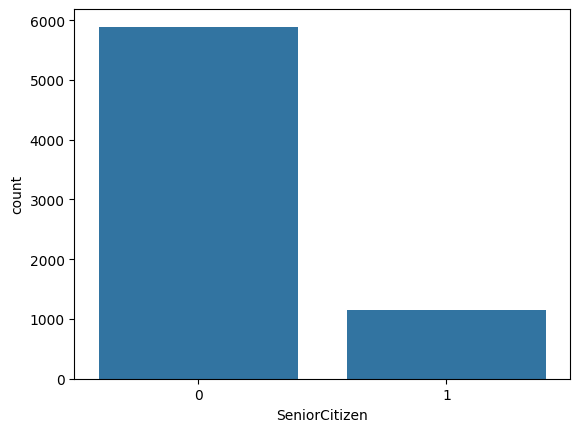

Categoric variable: Churn
       mean  count     ratio
Churn                       
0       0.0   5163  0.734215
1       1.0   1869  0.265785




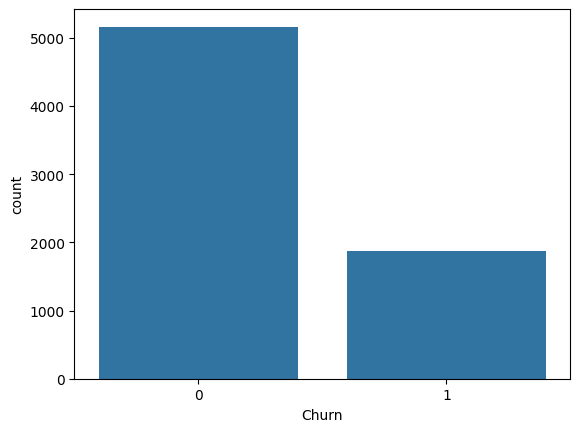

Categoric variable: gender
            mean  count     ratio
gender                           
Female  0.269595   3483  0.495307
Male    0.262046   3549  0.504693




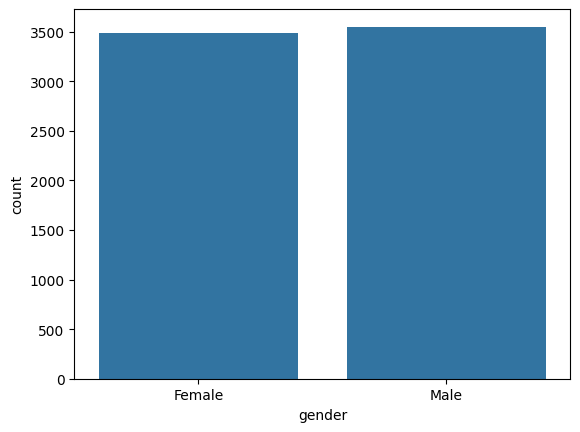

Categoric variable: Partner
             mean  count     ratio
Partner                           
No       0.329761   3639  0.517491
Yes      0.197171   3393  0.482509




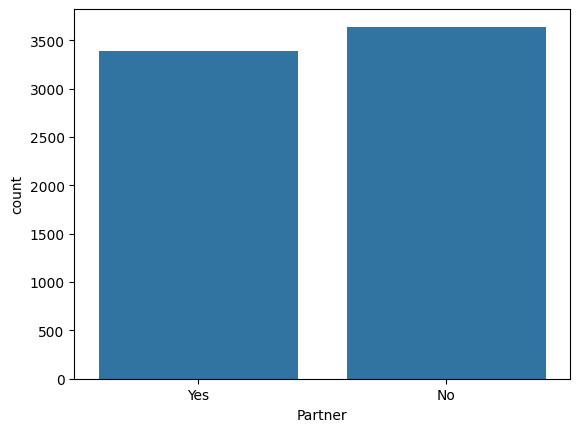

Categoric variable: Dependents
                mean  count     ratio
Dependents                           
No          0.312791   4933  0.701507
Yes         0.155312   2099  0.298493




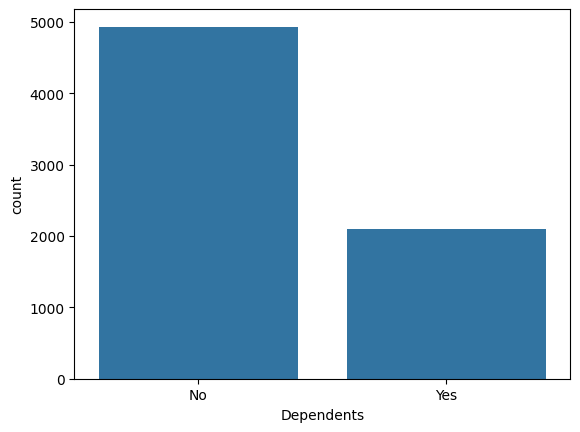

Categoric variable: PhoneService
                  mean  count     ratio
PhoneService                           
No            0.250000    680  0.096701
Yes           0.267475   6352  0.903299




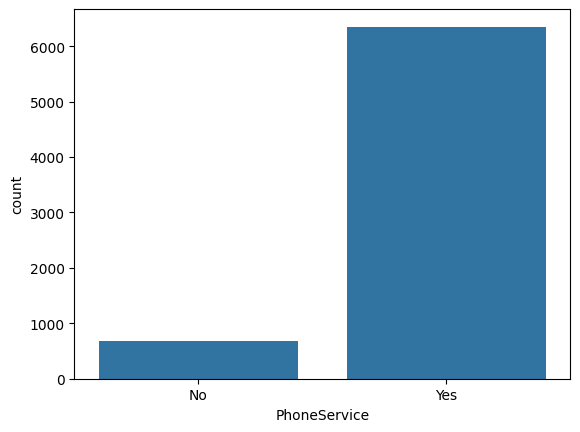

Categoric variable: MultipleLines
                      mean  count     ratio
MultipleLines                              
No                0.250812   3385  0.481371
No phone service  0.250000    680  0.096701
Yes               0.286485   2967  0.421928




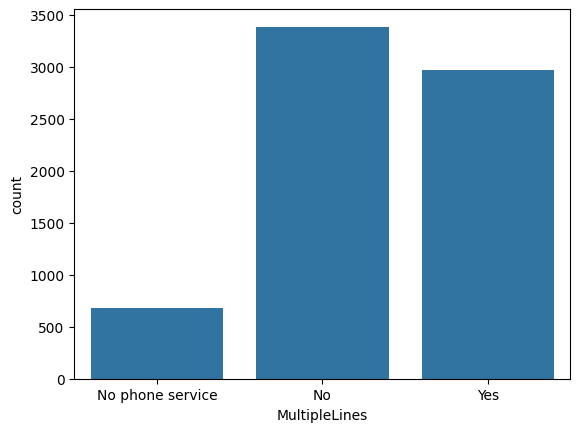

Categoric variable: InternetService
                     mean  count     ratio
InternetService                           
DSL              0.189983   2416  0.343572
Fiber optic      0.418928   3096  0.440273
No               0.074342   1520  0.216155




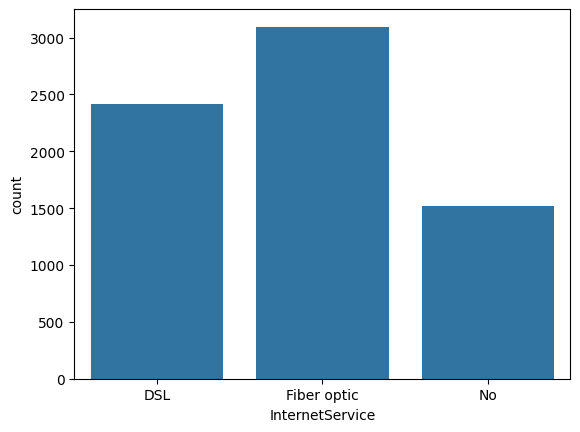

Categoric variable: OnlineSecurity
                         mean  count     ratio
OnlineSecurity                                
No                   0.417787   3497  0.497298
No internet service  0.074342   1520  0.216155
Yes                  0.146402   2015  0.286547




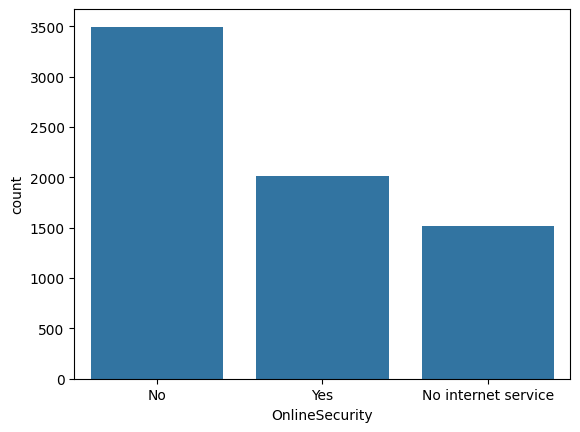

Categoric variable: OnlineBackup
                         mean  count     ratio
OnlineBackup                                  
No                   0.399417   3087  0.438993
No internet service  0.074342   1520  0.216155
Yes                  0.215670   2425  0.344852




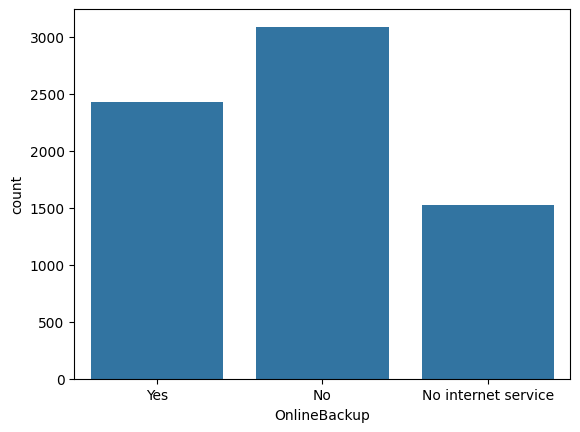

Categoric variable: DeviceProtection
                         mean  count     ratio
DeviceProtection                              
No                   0.391403   3094  0.439989
No internet service  0.074342   1520  0.216155
Yes                  0.225393   2418  0.343857




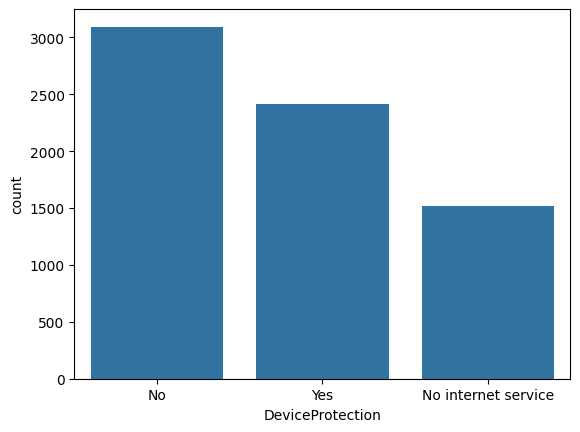

Categoric variable: TechSupport
                         mean  count     ratio
TechSupport                                   
No                   0.416475   3472  0.493743
No internet service  0.074342   1520  0.216155
Yes                  0.151961   2040  0.290102




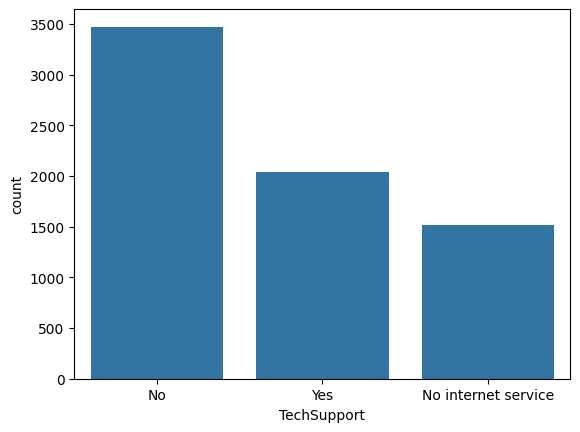

Categoric variable: StreamingTV
                         mean  count     ratio
StreamingTV                                   
No                   0.335351   2809  0.399460
No internet service  0.074342   1520  0.216155
Yes                  0.301147   2703  0.384386




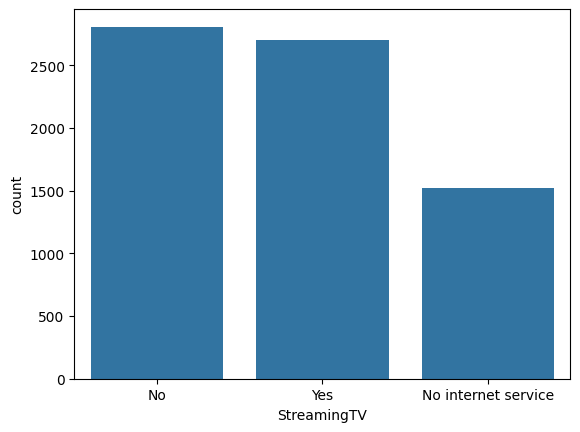

Categoric variable: StreamingMovies
                         mean  count     ratio
StreamingMovies                               
No                   0.337289   2781  0.395478
No internet service  0.074342   1520  0.216155
Yes                  0.299524   2731  0.388367




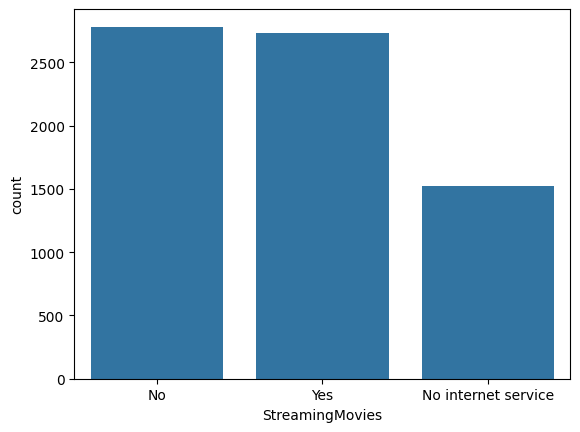

Categoric variable: Contract
                    mean  count     ratio
Contract                                 
Month-to-month  0.427097   3875  0.551052
One year        0.112772   1472  0.209329
Two year        0.028487   1685  0.239619




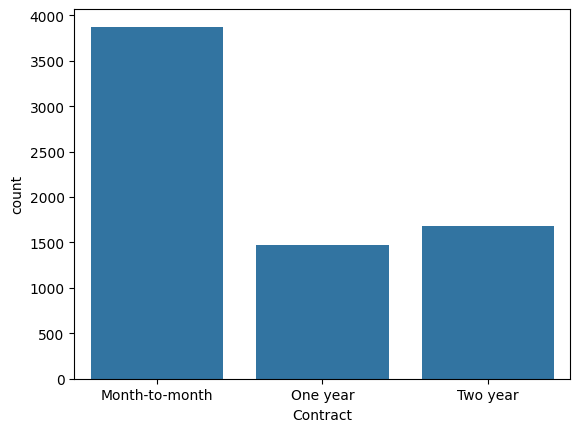

Categoric variable: PaperlessBilling
                      mean  count     ratio
PaperlessBilling                           
No                0.163757   2864  0.407281
Yes               0.335893   4168  0.592719




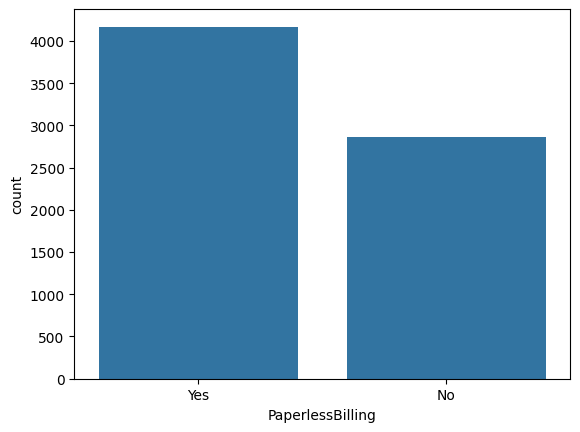

Categoric variable: PaymentMethod
                               mean  count     ratio
PaymentMethod                                       
Bank transfer (automatic)  0.167315   1542  0.219283
Credit card (automatic)    0.152531   1521  0.216297
Electronic check           0.452854   2365  0.336320
Mailed check               0.192020   1604  0.228100




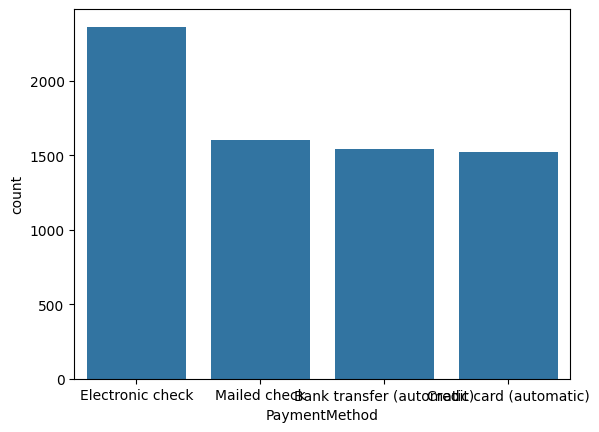

In [59]:
categorics_variables_relation_target_variables(dataframe=df,columns=cat,target="Churn",plot=True)

In [60]:
def numerical_variables_relation_target_variables(dataframe,columns,target="Churn",plot=False):
    for col in columns:
        relation_df=dataframe.groupby(col)[target].agg(["mean","count"])
        relation_df["ratio"]=relation_df["count"]/dataframe.shape[0]

        print(f"Numeric variable {col}")
        print(relation_df)
        print("\n")

        if plot:
            sns.histplot(x=dataframe[col],data=dataframe)
            plt.show()

Numeric variable tenure
            mean  count     ratio
tenure                           
1       0.619902    613  0.087173
2       0.516807    238  0.033845
3       0.470000    200  0.028441
4       0.471591    176  0.025028
5       0.481203    133  0.018914
...          ...    ...       ...
68      0.090000    100  0.014221
69      0.084211     95  0.013510
70      0.092437    119  0.016923
71      0.035294    170  0.024175
72      0.016575    362  0.051479

[72 rows x 3 columns]




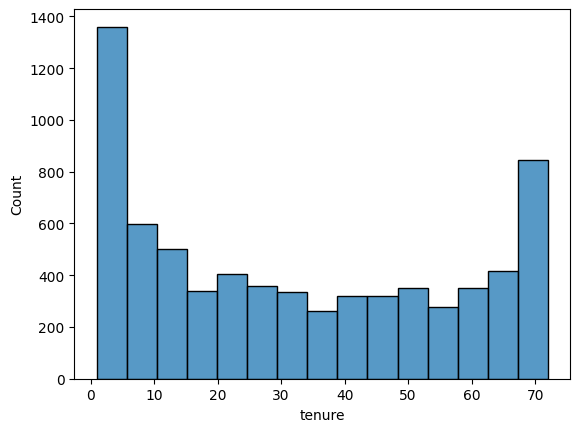

Numeric variable MonthlyCharges
                mean  count     ratio
MonthlyCharges                       
18.25            0.0      1  0.000142
18.40            0.0      1  0.000142
18.55            0.0      1  0.000142
18.70            0.0      2  0.000284
18.75            0.0      1  0.000142
...              ...    ...       ...
118.20           0.0      1  0.000142
118.35           1.0      1  0.000142
118.60           0.0      2  0.000284
118.65           0.0      1  0.000142
118.75           0.0      1  0.000142

[1584 rows x 3 columns]




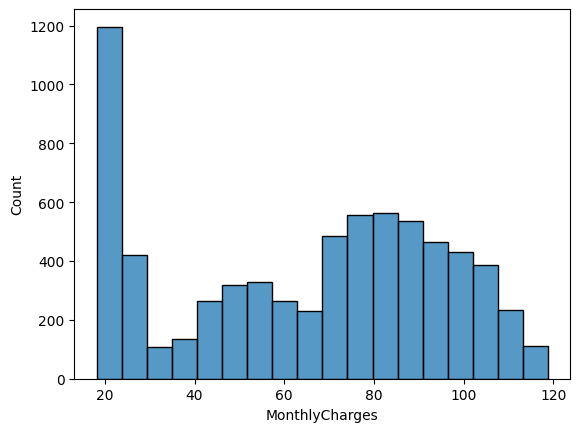

Numeric variable TotalCharges
              mean  count     ratio
TotalCharges                       
18.80          0.0      1  0.000142
18.85          0.5      2  0.000284
18.90          0.0      1  0.000142
19.00          0.0      1  0.000142
19.05          0.0      1  0.000142
...            ...    ...       ...
8564.75        0.0      1  0.000142
8594.40        0.0      1  0.000142
8670.10        0.0      1  0.000142
8672.45        0.0      1  0.000142
8684.80        1.0      1  0.000142

[6530 rows x 3 columns]




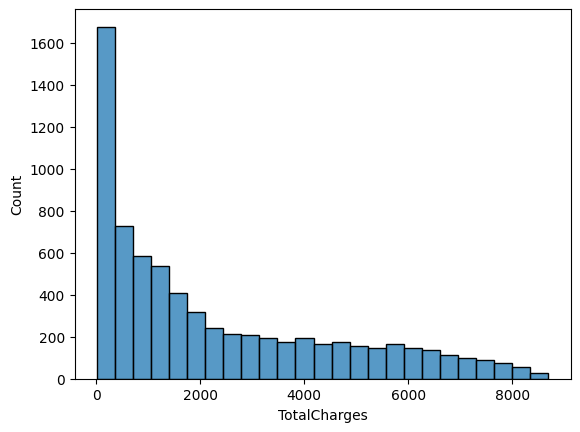

In [61]:
numerical_variables_relation_target_variables(dataframe=df,columns=num,plot=True)

In [65]:
def check_outlier(dataframe,columns, q1=0.25, q3=0.75, index=False):
    outlier_index = []
    limits = []
    
    for col in columns :
        
            col_q1 = dataframe[col].quantile(q1)
            col_q3 = dataframe[col].quantile(q3)
            iqr = col_q3 - col_q1
            lower_limit = col_q1 - iqr * 1.5
            upper_limit = col_q3 + iqr * 1.5
            
            limits.append(f"lower_limit: {lower_limit}, upper_limit: {upper_limit}, column: {col}")
            
            
            check_outliers = dataframe[(dataframe[col] < lower_limit) | (dataframe[col] > upper_limit)].any(axis=None)
            
            if check_outliers:
                print(f"Find outlier values in {col}")
                if index:
                    outlier_index.extend(check_outliers.index)
                    
    if index:
        return outlier_index
    else:
        return limits

            
            



In [67]:
check_outlier(df,num)

['lower_limit: -60.0, upper_limit: 124.0, column: tenure',
 'lower_limit: -45.824999999999996, upper_limit: 171.27499999999998, column: MonthlyCharges',
 'lower_limit: -4688.481250000001, upper_limit: 8884.66875, column: TotalCharges']

In [70]:
num

['tenure', 'MonthlyCharges', 'TotalCharges']

In [77]:
df["tenure"].max()

72

In [76]:
df["MonthlyCharges"].max()

118.75

In [78]:
df["TotalCharges"].max()

8684.8

In [ ]:
# No outlier values in dataframe

In [79]:
def missing_value_analyser(dataframe, index=False):
    indexes = []
    
    for col in dataframe.columns:
        null_counter = dataframe[col].isnull().sum()  
        
        if null_counter > 0:
            null_ratio = null_counter / dataframe.shape[0] 
            print(f"Null value found in '{col}' | Ratio: {null_ratio} | Counts: {null_counter}")
            
            if index:
                null_indexes = dataframe[dataframe[col].isnull()].index.tolist()
                indexes.extend(null_indexes)
        else:
            print(f"No null values found in '{col}'")
    
    if index:
        return indexes

In [80]:
missing_value_analyser(df)

No null values found in 'customerID'
No null values found in 'gender'
No null values found in 'SeniorCitizen'
No null values found in 'Partner'
No null values found in 'Dependents'
No null values found in 'tenure'
No null values found in 'PhoneService'
No null values found in 'MultipleLines'
No null values found in 'InternetService'
No null values found in 'OnlineSecurity'
No null values found in 'OnlineBackup'
No null values found in 'DeviceProtection'
No null values found in 'TechSupport'
No null values found in 'StreamingTV'
No null values found in 'StreamingMovies'
No null values found in 'Contract'
No null values found in 'PaperlessBilling'
No null values found in 'PaymentMethod'
No null values found in 'MonthlyCharges'
No null values found in 'TotalCharges'
No null values found in 'Churn'


In [83]:
def corelation_analayser(dataframe,columns):
    print(dataframe[columns].corr())
    sns.heatmap(dataframe[columns])

                  tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.246862      0.825880
MonthlyCharges  0.246862        1.000000      0.651065
TotalCharges    0.825880        0.651065      1.000000


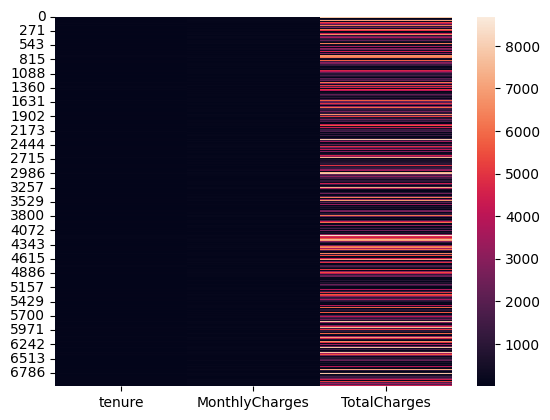

In [84]:
corelation_analayser(df,num)

In [85]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


<a id="3"><a>
#derive new variable

In [86]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [87]:
df.loc[(df["tenure"]>=0) & (df["tenure"]<=12),"NEW_TENURE_YEAR"] = "0-1 Year"
df.loc[(df["tenure"]>12) & (df["tenure"]<=24),"NEW_TENURE_YEAR"] = "1-2 Year"
df.loc[(df["tenure"]>24) & (df["tenure"]<=36),"NEW_TENURE_YEAR"] = "2-3 Year"
df.loc[(df["tenure"]>36) & (df["tenure"]<=48),"NEW_TENURE_YEAR"] = "3-4 Year"
df.loc[(df["tenure"]>48) & (df["tenure"]<=60),"NEW_TENURE_YEAR"] = "4-5 Year"
df.loc[(df["tenure"]>60) & (df["tenure"]<=72),"NEW_TENURE_YEAR"] = "5-6 Year"

In [88]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NEW_TENURE_YEAR
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-1 Year
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,2-3 Year
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0-1 Year
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3-4 Year
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0-1 Year


<a id ="4"><a>
#Handling missing values and outliers

In [89]:
check_outlier(df,num)

['lower_limit: -60.0, upper_limit: 124.0, column: tenure',
 'lower_limit: -45.824999999999996, upper_limit: 171.27499999999998, column: MonthlyCharges',
 'lower_limit: -4688.481250000001, upper_limit: 8884.66875, column: TotalCharges']

In [90]:
missing_value_analyser(df)

No null values found in 'customerID'
No null values found in 'gender'
No null values found in 'SeniorCitizen'
No null values found in 'Partner'
No null values found in 'Dependents'
No null values found in 'tenure'
No null values found in 'PhoneService'
No null values found in 'MultipleLines'
No null values found in 'InternetService'
No null values found in 'OnlineSecurity'
No null values found in 'OnlineBackup'
No null values found in 'DeviceProtection'
No null values found in 'TechSupport'
No null values found in 'StreamingTV'
No null values found in 'StreamingMovies'
No null values found in 'Contract'
No null values found in 'PaperlessBilling'
No null values found in 'PaymentMethod'
No null values found in 'MonthlyCharges'
No null values found in 'TotalCharges'
No null values found in 'Churn'
No null values found in 'NEW_TENURE_YEAR'


In [92]:
cate,nume,card=grab_col_names(df)

Observations : 7032
Feature count : 22
Categoric variables : ['SeniorCitizen', 'Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'NEW_TENURE_YEAR']
Numeric variables : ['tenure', 'MonthlyCharges', 'TotalCharges']
Cardinal variables : ['customerID']


<a id="5"><a>
#One hat encoding

In [93]:
cate

['SeniorCitizen',
 'Churn',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'NEW_TENURE_YEAR']

In [94]:
cleared_categoric_cols=  [col for col in cate if df[col].dtype not in ['int64', 'float64']]

In [95]:
cleared_categoric_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'NEW_TENURE_YEAR']

In [ ]:
dummies = pd.get_dummies(df[cleared_categoric_cols], drop_first=True, dtype=int)
df = pd.concat([df, dummies], axis=1)
df = df.drop(columns=cleared_categoric_cols)


In [98]:
df.head(3)

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,NEW_TENURE_YEAR_1-2 Year,NEW_TENURE_YEAR_2-3 Year,NEW_TENURE_YEAR_3-4 Year,NEW_TENURE_YEAR_4-5 Year,NEW_TENURE_YEAR_5-6 Year
0,7590-VHVEG,0,1,29.85,29.85,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
1,5575-GNVDE,0,34,56.95,1889.50,0,1,0,0,1,...,0,0,0,0,1,0,1,0,0,0
2,3668-QPYBK,0,2,53.85,108.15,1,1,0,0,1,...,0,1,0,0,1,0,0,0,0,0


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 37 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   SeniorCitizen                          7032 non-null   int64  
 2   tenure                                 7032 non-null   int64  
 3   MonthlyCharges                         7032 non-null   float64
 4   TotalCharges                           7032 non-null   float64
 5   Churn                                  7032 non-null   int64  
 6   gender_Male                            7032 non-null   int32  
 7   Partner_Yes                            7032 non-null   int32  
 8   Dependents_Yes                         7032 non-null   int32  
 9   PhoneService_Yes                       7032 non-null   int32  
 10  MultipleLines_No phone service         7032 non-null   int32  
 11  MultipleL

<a id="6"><a>
6.Train Model

In [100]:
x=df.drop(["customerID","Churn"],axis=1)

In [112]:

y=df["Churn"].values
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=42)
scaler=StandardScaler()
x_train=scaler.fit_transform(X_train)
x_test=scaler.transform(X_test)
lr=LogisticRegression()
lr.fit(x_train,Y_train)
y_pred=lr.predict(x_test)
dsc=DecisionTreeClassifier()
dsc.fit(x_train,Y_train)
y_pred2=dsc.predict(x_test)
rdc=RandomForestClassifier()
rdc.fit(x_train,Y_train)
y_pred3=rdc.predict(x_test)

In [113]:
accuary=accuracy_score(Y_test,y_pred)
print(f"accuracy_score {accuary}")
accuary=accuracy_score(Y_test,y_pred2)
print(f"accuracy_score {accuary}")
accuary=accuracy_score(Y_test,y_pred3)
print(f"accuracy_score {accuary}")

accuracy_score 0.7933649289099526
accuracy_score 0.7246445497630332
accuracy_score 0.7834123222748816
